In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import statistics
from scipy.stats import norm

df = pd.read_excel(r'C:\Users\ACER\Downloads\isotopes.xlsx')
print(df)


     Z    Element          Isotope   A   N
0    1   Hydrogen              H-1   1   0
1    1   Hydrogen  H-2 (Deuterium)   2   1
2    1   Hydrogen    H-3 (Tritium)   3   2
3    2     Helium             He-3   3   1
4    2     Helium             He-4   4   2
5    3    Lithium             Li-6   6   3
6    3    Lithium             Li-7   7   4
7    4  Beryllium             Be-9   9   5
8    5      Boron             B-10  10   5
9    5      Boron             B-11  11   6
10   6     Carbon             C-12  12   6
11   6     Carbon             C-13  13   7
12   6     Carbon             C-14  14   8
13   7   Nitrogen             N-14  14   7
14   7   Nitrogen             N-15  15   8
15   8     Oxygen             O-16  16   8
16   8     Oxygen             O-17  17   9
17   8     Oxygen             O-18  18  10
18   9   Fluorine             F-19  19  10
19  10       Neon            Ne-20  20  10
20  10       Neon            Ne-21  21  11
21  10       Neon            Ne-22  22  12
22  11     

In [140]:
Z=[]
for i in df["Z"]:
    Z.append(i)
A=[]

for i in df["A"]:
    A.append(i)
N=[]
for i in df["N"]:
    N.append(i)
    
print(Z)
print(A)
print(N)

[1, 1, 1, 2, 2, 3, 3, 4, 5, 5, 6, 6, 6, 7, 7, 8, 8, 8, 9, 10, 10, 10, 11, 12, 12, 12]
[1, 2, 3, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[0, 1, 2, 1, 2, 3, 4, 5, 5, 6, 6, 7, 8, 7, 8, 8, 9, 10, 10, 10, 11, 12, 12, 12, 13, 14]


In [141]:
def BE(A,Z):
    a_v=15.5
    a_s=16.8
    a_c=0.72
    a_sym=23
    
    d = delta()
    
    B = a_v*A-a_s*pow(A,2/3)-a_c*Z*(Z-1)*pow(A,-1/3)-a_sym*(A-2*Z)**2/A+d

    return B
    

def delta():
    a_p = 34
    
    for i in range(25):
    
        if int(Z[i])%2==0 and int(N[i])%2==0:
            return a_p * pow(A,-3/4)
        
        elif int(Z[i])%2!=0 and int(N[i])%2!=0:
            return -1*a_p * pow(A,-3/4)
    
        else:
            return 0

In [145]:
B = []
for j in range(len(Z)):
    B.append(BE(A[j],Z[j]))
print(B)

[-24.3, 4.33166232693425, 3.887925106061343, 2.889484870996429, 18.75950956760795, 35.15023459936615, 41.47963540485704, 60.101387338465734, 70.33741967490292, 78.83994375498717, 88.50842013542905, 97.66108036285159, 103.87884454434578, 106.86542249163217, 116.52395391795758, 125.32564670389755, 135.39314700612866, 143.11673381959625, 154.23994185015815, 162.3440175344933, 173.04141398275934, 181.78823800279812, 191.77926225146373, 199.26983933376988, 210.4387976847268, 219.93724957837526]


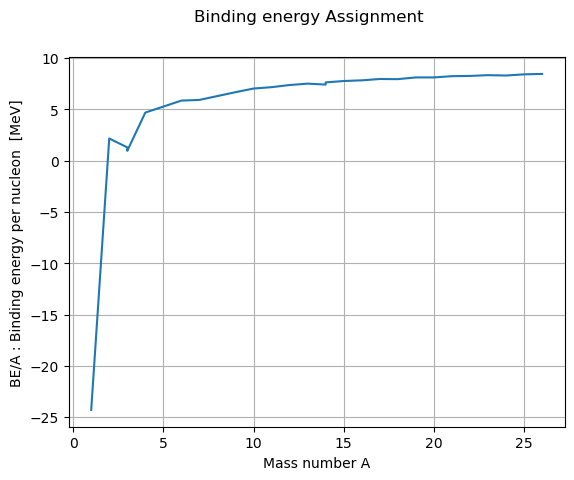

In [149]:
plt.xlabel("Mass number A")
plt.ylabel("BE/A : Binding energy per nucleon  [MeV]")
plt.grid("TRUE")
plt.suptitle(r"Binding energy Assignment")
plt.plot(np.array(A),np.array(B)/np.array(A))

In [154]:
def R(A):
    r0 = 1.2*pow(10,-15)
    return r0*pow(A,1/3)

def density(A,Z):
    mp = 1.00727647
    mn = 1.008665
    volume = 4/3*np.pi*pow(R(A),3)
    mass = Z*mp+(A-Z)*mn
    return mass/volume



def density2(A):
    mass_nuclion = 1.67 *pow(10,-27)
    #mn = 1.008665*pow(10,-27)
    r0 = 1.5*pow(10,-15)
    volume = (4/3)*np.pi*pow(r0,3)*A
    mass = A*mass_nuclion#Z*mp+(A-Z)*mn
    return mass/volume

D=[]
for i in range(len(Z)):
    D.append(density(A[i],Z[i]))
    
D1=[]
for i in range(len(A)):
    D1.append(density2(A[i]))
print(D)
print(D1)

[1.3916061567765213e+44, 1.392565320896015e+44, 1.39288504226918e+44, 1.3922455995228509e+44, 1.392565320896015e+44, 1.392565320896015e+44, 1.3927023443416576e+44, 1.3926718946870701e+44, 1.3925653208960152e+44, 1.3926525176341518e+44, 1.392565320896015e+44, 1.3926391027513613e+44, 1.3927023443416574e+44, 1.3925653208960154e+44, 1.3926292651706486e+44, 1.392565320896015e+44, 1.3926217423148093e+44, 1.3926718946870703e+44, 1.3926158032180935e+44, 1.3925653208960154e+44, 1.3926109953778963e+44, 1.3926525176341516e+44, 1.3926070236838195e+44, 1.3925653208960154e+44, 1.3926036874607952e+44, 1.3926391027513613e+44]
[1.1812833553931789e+17, 1.1812833553931789e+17, 1.1812833553931789e+17, 1.1812833553931789e+17, 1.1812833553931789e+17, 1.1812833553931789e+17, 1.1812833553931787e+17, 1.1812833553931787e+17, 1.1812833553931789e+17, 1.1812833553931789e+17, 1.1812833553931789e+17, 1.1812833553931787e+17, 1.1812833553931787e+17, 1.1812833553931787e+17, 1.181283355393179e+17, 1.1812833553931789e+17

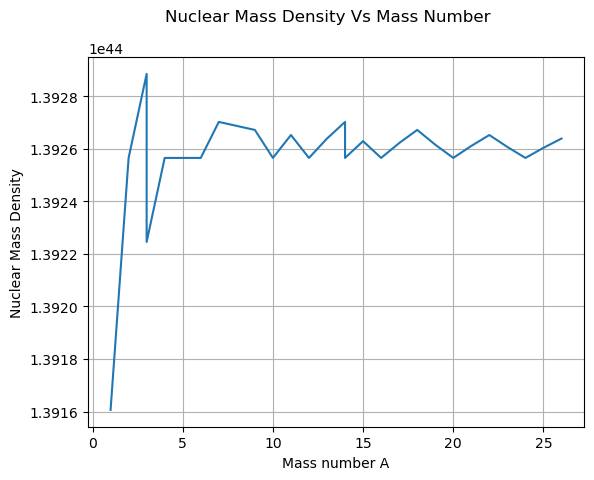

In [155]:
plt.xlabel("Mass number A")
plt.ylabel("Nuclear Mass Density")
plt.grid("TRUE")
plt.suptitle(r"Nuclear Mass Density Vs Mass Number")
plt.plot(np.array(A),np.array(D))

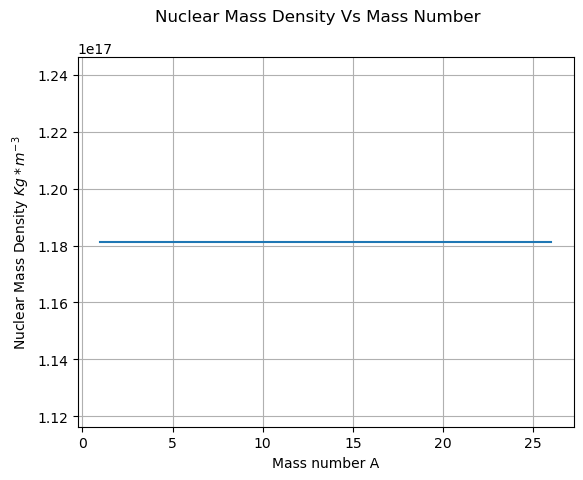

In [156]:
plt.xlabel("Mass number A")
plt.ylabel(r"Nuclear Mass Density $Kg*m^{-3}$")
plt.grid("TRUE")
plt.suptitle(r"Nuclear Mass Density Vs Mass Number")
plt.plot(np.array(A),np.array(D1))